# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [93]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from datetime import datetime
from api_keys import weather_api_key
from citipy import citipy
from pprint import pprint
weather_api_key                # See if my API key is properly updated and displayed

'73af4b952662b608e7025d93ddf7ebe6'

## Generate Cities List

In [31]:
# Set range for generating numpy random numbers 
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create place holders for coordinates and cities. 
lat_lngs = []
cities = []

# Generating random coordinates and zip it
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Put them into the place holders
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

# Print out and count the number of city.
print(cities)
len(cities)


['barentsburg', 'taolanaro', 'bluff', 'butaritari', 'burgersdorp', 'bubaque', 'port elizabeth', 'chikoy', 'cabo san lucas', 'bijie', 'esperance', 'tuktoyaktuk', 'nicoya', 'nyaunglebin', 'psyzh', 'adrar', 'saint-philippe', 'cherskiy', 'huangpi', 'punta arenas', 'nizhneyansk', 'ancud', 'thai binh', 'ushuaia', 'marsh harbour', 'hilo', 'cidreira', 'attawapiskat', 'arvika', 'ust-omchug', 'arraial do cabo', 'port alfred', 'clyde river', 'port-gentil', 'tongliao', 'karakendzha', 'okhotsk', 'yulara', 'kinanah', 'baft', 'opunake', 'hermanus', 'thompson', 'phuket', 'herne bay', 'hobart', 'busselton', 'vaini', 'tiksi', 'carutapera', 'skjervoy', 'ternate', 'cape town', 'christchurch', 'mahebourg', 'rikitea', 'fort nelson', 'kahului', 'tuatapere', 'castro', 'henties bay', 'mataura', 'pirogovo', 'kudahuvadhoo', 'dhidhdhoo', 'new norfolk', 'orlik', 'vila velha', 'puerto ayora', 'waingapu', 'bucerias', 'jamestown', 'wanxian', 'ponta do sol', 'cayenne', 'narrabri', 'severo-kurilsk', 'umzimvubu', 'esna'

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
# Create the place holders

lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
speed=[]
country=[]
date=[]


# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


# Build query URL

print("Begin Data Retrieval from OpenWeatherMap.org")

for number in range(len(cities)):
    try : 
        query_url = f"{url}appid={weather_api_key}&q={cities[number]}&units={units}"
        response_single = requests.get(query_url).json()
        lat.append(response_single["coord"]["lat"])
        lng.append(response_single["coord"]["lon"])
        max_temp.append(response_single["main"]["temp_max"])
        humidity.append(response_single["main"]["humidity"])
        cloudiness.append(response_single["clouds"]["all"])
        speed.append(response_single["wind"]["speed"])
        country.append(response_single["sys"]["country"])
        date.append(datetime.utcfromtimestamp(int(response_single['dt'])).strftime('%Y-%m-%d'))
        print(f"Processing City {number} of Set 1 | {cities[number]}")
    except KeyError:
        print("CITY NOT FOUND.. Skip to next city")


Begin Data Retrieval from OpenWeatherMap.org
CITY NOT FOUND.. Skip to next city
CITY NOT FOUND.. Skip to next city
Processing City 2 of Set 1 | bluff
Processing City 3 of Set 1 | butaritari
Processing City 4 of Set 1 | burgersdorp
Processing City 5 of Set 1 | bubaque
Processing City 6 of Set 1 | port elizabeth
CITY NOT FOUND.. Skip to next city
Processing City 8 of Set 1 | cabo san lucas
Processing City 9 of Set 1 | bijie
Processing City 10 of Set 1 | esperance
Processing City 11 of Set 1 | tuktoyaktuk
Processing City 12 of Set 1 | nicoya
Processing City 13 of Set 1 | nyaunglebin
Processing City 14 of Set 1 | psyzh
Processing City 15 of Set 1 | adrar
Processing City 16 of Set 1 | saint-philippe
Processing City 17 of Set 1 | cherskiy
Processing City 18 of Set 1 | huangpi
Processing City 19 of Set 1 | punta arenas
CITY NOT FOUND.. Skip to next city
Processing City 21 of Set 1 | ancud
Processing City 22 of Set 1 | thai binh
Processing City 23 of Set 1 | ushuaia
Processing City 24 of Set 1

Processing City 209 of Set 1 | rawson
Processing City 210 of Set 1 | melfi
Processing City 211 of Set 1 | pinega
Processing City 212 of Set 1 | anshun
Processing City 213 of Set 1 | richards bay
Processing City 214 of Set 1 | chuy
Processing City 215 of Set 1 | longkou
Processing City 216 of Set 1 | pimentel
Processing City 217 of Set 1 | faanui
Processing City 218 of Set 1 | olafsvik
Processing City 219 of Set 1 | franca
Processing City 220 of Set 1 | liuhe
Processing City 221 of Set 1 | bangkalan
Processing City 222 of Set 1 | teya
Processing City 223 of Set 1 | broome
Processing City 224 of Set 1 | kodiak
Processing City 225 of Set 1 | shimoda
Processing City 226 of Set 1 | iqaluit
Processing City 227 of Set 1 | okato
Processing City 228 of Set 1 | arlit
Processing City 229 of Set 1 | morgan city
Processing City 230 of Set 1 | bianzhuang
Processing City 231 of Set 1 | bambanglipuro
Processing City 232 of Set 1 | angoche
Processing City 233 of Set 1 | lerik
Processing City 234 of Set

Processing City 417 of Set 1 | vanavara
Processing City 418 of Set 1 | urucara
Processing City 419 of Set 1 | oyama
Processing City 420 of Set 1 | chokurdakh
Processing City 421 of Set 1 | kattivakkam
Processing City 422 of Set 1 | nambucca heads
CITY NOT FOUND.. Skip to next city
Processing City 424 of Set 1 | santa maria
Processing City 425 of Set 1 | mitu
Processing City 426 of Set 1 | tongzhou
Processing City 427 of Set 1 | lompoc
Processing City 428 of Set 1 | kenai
Processing City 429 of Set 1 | gundorovskiy
Processing City 430 of Set 1 | aktash
Processing City 431 of Set 1 | eskilstuna
Processing City 432 of Set 1 | san patricio
Processing City 433 of Set 1 | hobyo
Processing City 434 of Set 1 | aden
CITY NOT FOUND.. Skip to next city
Processing City 436 of Set 1 | dabola
Processing City 437 of Set 1 | sung noen
Processing City 438 of Set 1 | eydhafushi
Processing City 439 of Set 1 | la sarre
Processing City 440 of Set 1 | aksha
Processing City 441 of Set 1 | xichang
Processing 

Processing City 624 of Set 1 | bollnas
Processing City 625 of Set 1 | mashhad
Processing City 626 of Set 1 | sangmelima
Processing City 627 of Set 1 | urengoy
Processing City 628 of Set 1 | nhamunda
Processing City 629 of Set 1 | khasan
Processing City 630 of Set 1 | umm lajj
Processing City 631 of Set 1 | rabat
Processing City 632 of Set 1 | gumdag
Processing City 633 of Set 1 | belaya gora


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
# print out to test
print(lat)
print(lng)
print(max_temp)
print(humidity)
print(cloudiness)
print(speed)
print(country)
print(date)

[-46.6, 3.0707, -30.9977, 11.2833, -33.918, 22.8909, 27.3125, -33.8667, 69.4541, 10.1483, 17.95, 44.2331, 20.5022, -21.3585, 68.75, 30.8845, -53.15, -41.8697, 20.45, -54.8, 26.5412, 19.7297, -30.1811, 59.6553, 61.15, -22.9661, -33.5906, 70.4692, -0.7193, 43.6125, 59.3833, -25.2406, 29.234, -39.4556, -34.4187, 55.7435, 8, 51.373, -42.8794, -33.65, -21.2, 71.6872, -1.195, 70.0311, 0.8, -33.9258, -43.5333, -20.4081, -23.1203, 58.8053, 20.8947, -46.1333, -24.7911, -22.116, -46.1927, 56.7796, 2.6708, 6.8833, -42.7826, 52.5178, -20.3297, -0.7393, -9.6567, 20.75, 42.097, 30.8039, 32.6667, 4.9333, -30.3167, 50.6789, 25.2934, 31.8111, 18.6853, 45.0205, 22.0752, 62.456, -40.8135, -13.8483, -0.6, 73.5069, 46.4833, -2.6741, 35.7333, 63.8424, -22.2763, 34.1667, 69.3833, 55.6848, 35.8614, -8.9266, 64.8569, 42.6001, -33.295, 65.4167, 5.4112, 10.9995, 51.4667, 54.2797, 38.4167, 50.0622, -34.5322, 64.3833, -9.8, 22.2855, -21.2078, 26.5921, -29.9533, 5.7856, 32.3754, 24.1447, 35.1333, 32.2207, 64.1835, 

In [37]:
weather_dict = {
            "City": cities,
            "Lat": lat,
            "Lng": lng,
            "Cloudiness": cloudiness,
            "Country": country,
            "Date": date,
            "Humidity": humidity,
            "Temp max": max_temp,
            "Wind Speed": speed
}

df = pd.DataFrame.from_dict(weather_dict, orient='index')
df = df.transpose()
df.dropna(inplace = True)
df
df.to_csv("cities_data_output.csv")
df

,City,Lat,Lng,Cloudiness,Country,Date,Humidity,Temp max,Wind Speed
0,barentsburg,-46.6,168.3333,100,NZ,2021-07-25,83,48.79,5.44
1,taolanaro,3.0707,172.7902,12,KI,2021-07-25,77,81.72,10.54
2,bluff,-30.9977,26.3286,1,ZA,2021-07-25,28,40.62,4.32
3,butaritari,11.2833,-15.8333,99,GW,2021-07-25,79,79.03,5.91
4,burgersdorp,-33.918,25.5701,0,ZA,2021-07-25,58,58.1,2.3
...,...,...,...,...,...,...,...,...,...
581,skoghall,42.4308,130.6434,73,RU,2021-07-25,96,73.74,3.76
582,muzaffarabad,25.0213,37.2685,4,SA,2021-07-25,47,89.19,7.11
583,sao gabriel da cachoeira,33.9911,-6.8401,20,MA,2021-07-25,76,83.05,9.22
584,ambatolampy,39.2061,54.5906,1,TM,2021-07-25,68,84.16,13.8


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [72]:
# check data type
df.dtypes

# Change object to numeric values
df["Lat"] = pd.to_numeric(df["Lat"])
df["Lng"] = pd.to_numeric(df["Lng"])
df["Temp max"] = pd.to_numeric(df["Temp max"])
df["Humidity"] = pd.to_numeric(df["Humidity"])
df["Cloudiness"] = pd.to_numeric(df["Cloudiness"])
df["Wind Speed"] = pd.to_numeric(df["Wind Speed"])

# Verify
df.dtypes

# Create descriptive stats
df.describe()

,Lat,Lng,Cloudiness,Humidity,Temp max,Wind Speed
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,21.116736,23.358180,52.025597,68.424915,70.839761,8.098823
std,33.472427,90.837649,37.649363,21.841120,14.467724,5.602314
min,-54.800000,-179.166700,0.000000,7.000000,33.480000,0.000000
25%,-5.234150,-53.720575,11.000000,56.000000,59.535000,4.000000
50%,27.246750,26.645500,54.000000,74.000000,72.310000,6.930000
75%,49.970900,105.883900,90.000000,84.000000,81.230000,11.217500
max,78.218600,178.416700,100.000000,100.000000,111.420000,40.510000


In [79]:
#  Get the indices of cities that have humidity over 100%.
over_100 = df.loc[df["Humidity"]>100,:]
over_100

,City,Lat,Lng,Cloudiness,Country,Date,Humidity,Temp max,Wind Speed


In [80]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_df = df.loc[df["Humidity"]<=100,:]
clean_df

,City,Lat,Lng,Cloudiness,Country,Date,Humidity,Temp max,Wind Speed
0,barentsburg,-46.6000,168.3333,100,NZ,2021-07-25,83,48.79,5.44
1,taolanaro,3.0707,172.7902,12,KI,2021-07-25,77,81.72,10.54
2,bluff,-30.9977,26.3286,1,ZA,2021-07-25,28,40.62,4.32
3,butaritari,11.2833,-15.8333,99,GW,2021-07-25,79,79.03,5.91
4,burgersdorp,-33.9180,25.5701,0,ZA,2021-07-25,58,58.10,2.30
...,...,...,...,...,...,...,...,...,...
581,skoghall,42.4308,130.6434,73,RU,2021-07-25,96,73.74,3.76
582,muzaffarabad,25.0213,37.2685,4,SA,2021-07-25,47,89.19,7.11
583,sao gabriel da cachoeira,33.9911,-6.8401,20,MA,2021-07-25,76,83.05,9.22
584,ambatolampy,39.2061,54.5906,1,TM,2021-07-25,68,84.16,13.80


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

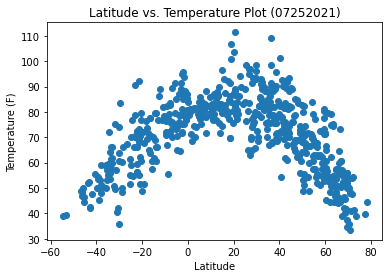

In [86]:
# Set date

set_date = datetime.today().strftime('%m%d%Y')

# create latitude vs. temperature plot with proper labels
plt.title(f"Latitude vs. Temperature Plot ({set_date})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.scatter(clean_df["Lat"], clean_df["Temp max"])

#saving figure and show
plt.savefig("lat_vs_temp.png")
plt.show()

## Latitude vs. Humidity Plot

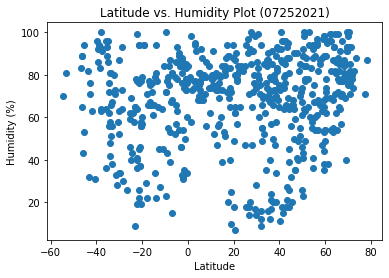

In [87]:
# create latitude vs. humidity plot with proper labels
plt.title(f"Latitude vs. Humidity Plot ({set_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(clean_df["Lat"], clean_df["Humidity"])

#saving figure and show
plt.savefig("lat_vs_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

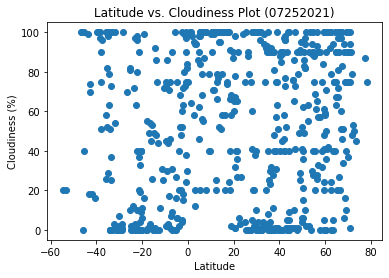

In [88]:
# create latitude vs. cloudiness plot with proper labels
plt.title(f"Latitude vs. Cloudiness Plot ({set_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(clean_df["Lat"], clean_df["Cloudiness"])

# saving figure and show
plt.savefig("lat_vs_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

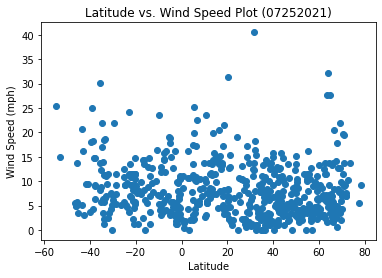

In [89]:
# create latitude vs. wind speed plot with proper labels
plt.title(f"Latitude vs. Wind Speed Plot ({set_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(clean_df["Lat"], clean_df["Wind Speed"])

# saving figure and show
plt.savefig("lat_vs_wind.png")
plt.show()

## Linear Regression

In [91]:
# Create two dataset for each

Northern = df.loc[clean_df["Lat"]>=0,:]
Southern = df.loc[clean_df["Lat"]<0,:]

,City,Lat,Lng,Cloudiness,Country,Date,Humidity,Temp max,Wind Speed
0,barentsburg,-46.6000,168.3333,100,NZ,2021-07-25,83,48.79,5.44
2,bluff,-30.9977,26.3286,1,ZA,2021-07-25,28,40.62,4.32
4,burgersdorp,-33.9180,25.5701,0,ZA,2021-07-25,58,58.10,2.30
7,chikoy,-33.8667,121.9000,0,AU,2021-07-25,81,53.44,18.37
13,nyaunglebin,-21.3585,55.7679,37,RE,2021-07-25,76,69.39,11.48
...,...,...,...,...,...,...,...,...,...
549,flin flon,-35.1667,173.1667,82,NZ,2021-07-25,93,57.24,8.88
551,muisne,-23.6500,-70.4000,72,CL,2021-07-25,58,66.22,9.62
562,barbar,-28.5500,16.4333,100,NA,2021-07-25,30,66.18,5.35
567,kamthi,-24.3200,-46.9983,0,BR,2021-07-25,43,76.80,5.14


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4922533131239405


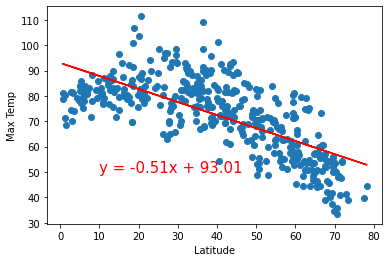

In [105]:
# Print out the r-squared value along with the plot.
x_values = Northern['Lat']
y_values = Northern['Temp max']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6263795952862989


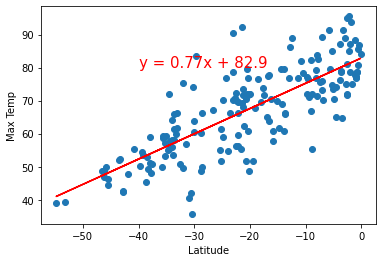

In [107]:
# Print out the r-squared value along with the plot.
x_values = Southern['Lat']
y_values = Southern['Temp max']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.007242116651873508


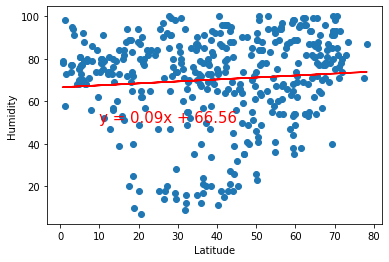

In [108]:
# Print out the r-squared value along with the plot.
x_values = Northern['Lat']
y_values = Northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.002213880994874612


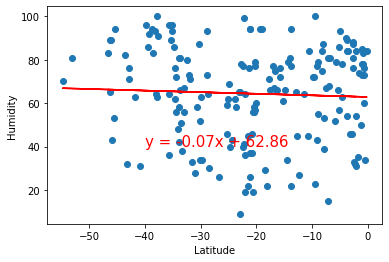

In [110]:
# Print out the r-squared value along with the plot.
x_values = Southern['Lat']
y_values = Southern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.002664943723737199


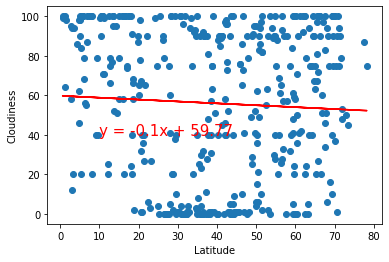

In [112]:
# Print out the r-squared value along with the plot.
x_values = Northern['Lat']
y_values = Northern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.009085344907328189


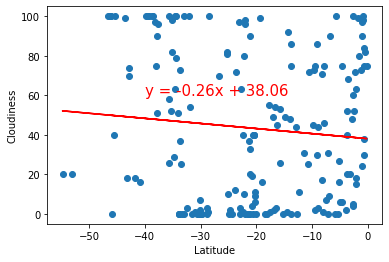

In [119]:
# Print out the r-squared value along with the plot.
x_values = Southern['Lat']
y_values = Southern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00840393652058516


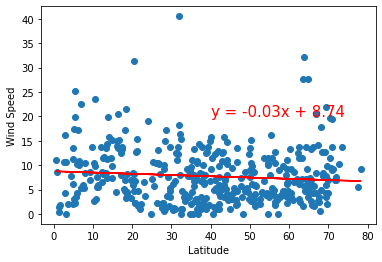

In [116]:
# Print out the r-squared value along with the plot.
x_values = Northern['Lat']
y_values = Northern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04301693655860856


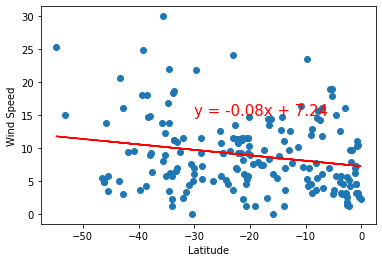

In [118]:
# Print out the r-squared value along with the plot.
x_values = Southern['Lat']
y_values = Southern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [122]:
# you must include a written description of three observable trends based on the data
----

# #### Note
# 1.In Northern Hemisphere, max temperature get lowers as latitude increase, which makes sense. Trend wise, Southern Hemisphere has opposite trend. 
# 2. cloudiness, and wind speed has nothing to do with latitude. The weather conditions would be heavily affected by other factors, not geographic location. 
# 3. it seems humidity is affected by geographic location. However, cities close to the sea tend to be more humid. I don’t see relationship between humidity and latitudes. 


SyntaxError: invalid syntax (<ipython-input-122-ca5130f03e27>, line 2)